- [numpy](https://numpy.org/) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a popular library to plot graphs in Python.
- [tensorflow](https://www.tensorflow.org/) a popular platform for machine learning.

In [1]:
from public_tests import *
from lab_utils_softmax import plt_softmax
from autils import *
import logging
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
%matplotlib widget
plt.style.use('./deeplearning.mplstyle')

logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)


np.set_printoptions(precision=2)


2023-10-23 16:14:46.205831: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-23 16:14:46.206965: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-23 16:14:46.230574: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-23 16:14:46.231027: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-23 16:14:46.676035: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

2023-10-23 16:14:49.306226: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-23 16:14:49.327746: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


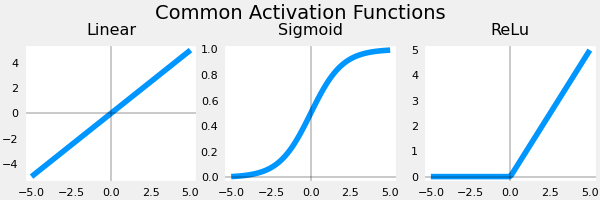

In [2]:
plt_act_trio()

Let's create a NumPy implementation:

In [3]:
def my_softmax(z):

    ez = np.exp(z)
    a = ez/np.sum(ez)

    return a


In [4]:
z = np.array([1., 2., 3., 4.])
a = my_softmax(z)
atf = tf.nn.softmax(z)
print(f"my_softmax(z):         {a}")
print(f"tensorflow softmax(z): {atf}")

my_softmax(z):         [0.03 0.09 0.24 0.64]
tensorflow softmax(z): [0.03 0.09 0.24 0.64]


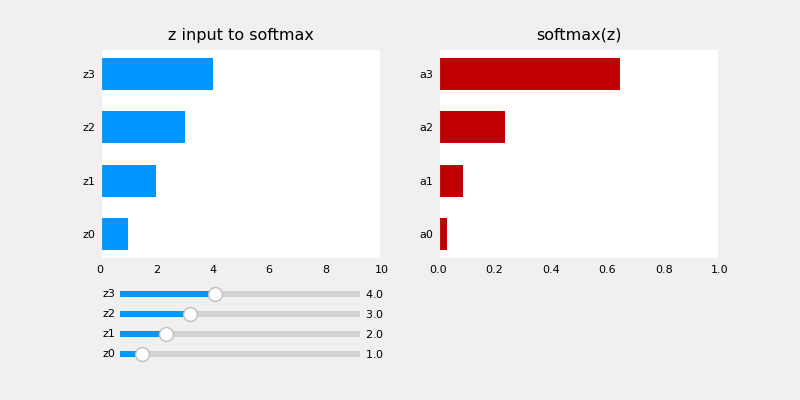

In [5]:
plt.close("all")
plt_softmax(my_softmax)

$^1$<sub> This is a subset of the MNIST handwritten digit dataset (http://yann.lecun.com/exdb/mnist/)</sub>

In [6]:
# load dataset
X, y = load_data()

In [7]:
print('The first element of X is: ', X[0])


The first element of X is:  [ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  8.56e-06  1.94e-06 -7.37e-04
 -8.13e-03 -1.86e-02 -1.87e-02 -1.88e-02 -1.91e-02 -1.64e-02 -3.78e-03
  3.30e-04  1.28e-05  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  1.16e-04  1.20e-04 -1.40e-02 -2.85e-02  8.04e-02
  2.67e-01  2.74e-01  2.79e-01  2.74e-01  2.25e-0

In [8]:
print('The first element of y is: ', y[0, 0])
print('The last element of y is: ', y[-1, 0])


The first element of y is:  0
The last element of y is:  9


In [9]:
print('The shape of X is: ' + str(X.shape))
print('The shape of y is: ' + str(y.shape))


The shape of X is: (5000, 400)
The shape of y is: (5000, 1)


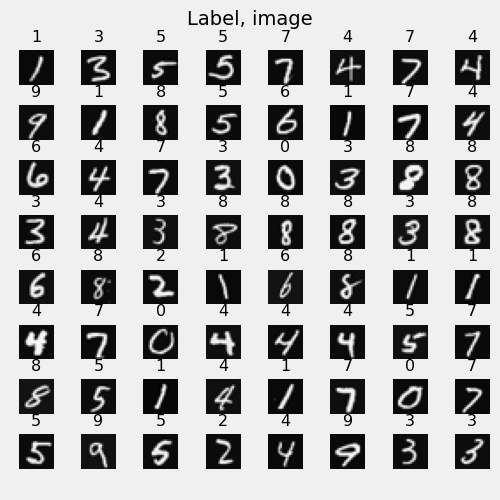

In [10]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8, 8, figsize=(5, 5))
# [left, bottom, right, top]
fig.tight_layout(pad=0.13, rect=[0, 0.03, 1, 0.91])

# fig.tight_layout(pad=0.5)
widgvis(fig)
for i, ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)

    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20, 20)).T

    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    # Display the label above the image
    ax.set_title(y[random_index, 0])
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize=14)


In [11]:
tf.random.set_seed(1234)  # for consistent results
model = Sequential(
    [
        tf.keras.Input(shape=(400,)),
        Dense(25, activation='relu',   name="L1"),
        Dense(15, activation='relu',   name="L2"),
        Dense(10, activation='linear', name="L3")
    ], name="my_model"
)


In [12]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 25)                10025     
                                                                 
 L2 (Dense)                  (None, 15)                390       
                                                                 
 L3 (Dense)                  (None, 10)                160       
                                                                 
Total params: 10575 (41.31 KB)
Trainable params: 10575 (41.31 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
[layer1, layer2, layer3] = model.layers

In [14]:
W1, b1 = layer1.get_weights()
W2, b2 = layer2.get_weights()
W3, b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")


W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 10), b3 shape = (10,)


In [15]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

history = model.fit(
    X, y,
    epochs=40
)


Epoch 1/40
157/157 [==============================] - 0s 650us/step - loss: 1.5369
Epoch 2/40
157/157 [==============================] - 0s 821us/step - loss: 0.5852
Epoch 3/40
157/157 [==============================] - 0s 953us/step - loss: 0.4105
Epoch 4/40
157/157 [==============================] - 0s 646us/step - loss: 0.3340
Epoch 5/40
157/157 [==============================] - 0s 482us/step - loss: 0.2883
Epoch 6/40
157/157 [==============================] - 0s 483us/step - loss: 0.2567
Epoch 7/40
157/157 [==============================] - 0s 743us/step - loss: 0.2313
Epoch 8/40
157/157 [==============================] - 0s 837us/step - loss: 0.2125
Epoch 9/40
157/157 [==============================] - 0s 681us/step - loss: 0.2003
Epoch 10/40
157/157 [==============================] - 0s 727us/step - loss: 0.1815
Epoch 11/40
157/157 [==============================] - 0s 680us/step - loss: 0.1688
Epoch 12/40
157/157 [==============================] - 0s 1ms/step - loss: 0.1595
Epo

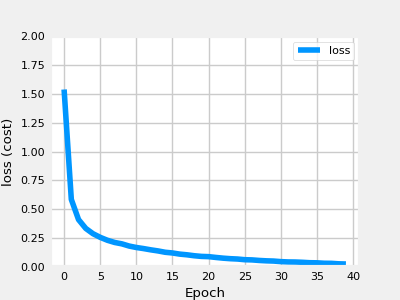

In [16]:
plot_loss_tf(history)

#### Prediction 
To make a prediction, use Keras `predict`. Below, X[1015] contains an image of a two.

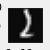

1/1 [==============================] - 0s 39ms/step
 predicting a Two: 
[[ -4.94   2.46   4.71   1.42 -15.92  -5.6   -4.31   2.52  -4.05  -3.  ]]
 Largest Prediction index: 2


In [17]:
image_of_two = X[1015]
display_digit(image_of_two)

prediction = model.predict(image_of_two.reshape(1, 400))  # prediction

print(f" predicting a Two: \n{prediction}")
print(f" Largest Prediction index: {np.argmax(prediction)}")


In [18]:
prediction_p = tf.nn.softmax(prediction)

print(f" predicting a Two. Probability vector: \n{prediction_p}")
print(f"Total of predictions: {np.sum(prediction_p):0.3f}")

 predicting a Two. Probability vector: 
[[5.11e-05 8.38e-02 7.97e-01 2.97e-02 8.73e-10 2.64e-05 9.63e-05 8.91e-02
  1.25e-04 3.57e-04]]
Total of predictions: 1.000


In [19]:
yhat = np.argmax(prediction_p)

print(f"np.argmax(prediction_p): {yhat}")

np.argmax(prediction_p): 2


1/1 [==============================] - 0s 10ms/step


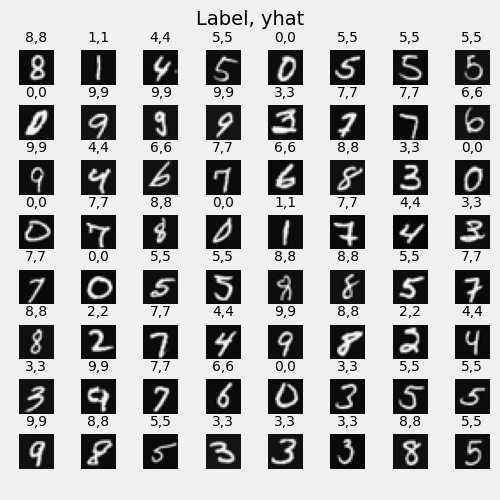

In [20]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8, 8, figsize=(5, 5))
# [left, bottom, right, top]
fig.tight_layout(pad=0.13, rect=[0, 0.03, 1, 0.91])
widgvis(fig)
for i, ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)

    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20, 20)).T

    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    # Predict using the Neural Network
    prediction = model.predict(X[random_index].reshape(1, 400))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)

    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{yhat}", fontsize=10)
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=14)
plt.show()


1/1 [==============================] - 0s 10ms/step
16 errors out of 5000 images


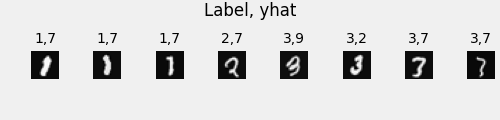

In [21]:
print(f"{display_errors(model,X,y)} errors out of {len(X)} images")
